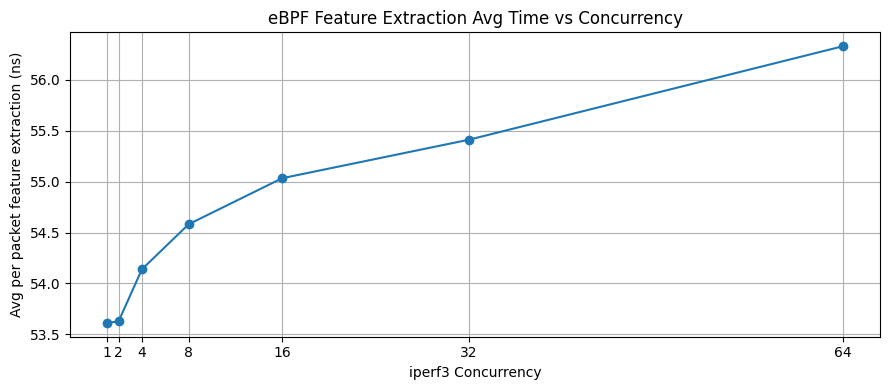

Concurrency 1: Avg per call = 53.61 ns
Concurrency 2: Avg per call = 53.63 ns
Concurrency 4: Avg per call = 54.14 ns
Concurrency 8: Avg per call = 54.58 ns
Concurrency 16: Avg per call = 55.03 ns
Concurrency 32: Avg per call = 55.41 ns
Concurrency 64: Avg per call = 56.33 ns


In [2]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
import re

# -------------------------
# 1. 粘贴你全部 perf_stats 输出（带并发标记如 "1:", "2:", "4:" 等）
# -------------------------
raw_text = """
1:
[perf_stats] Avg per call: 53.99 ns | Max: 66221 ns | Calls: 2207296
[perf_stats] Avg per call: 53.81 ns | Max: 129121 ns | Calls: 2886742
[perf_stats] Avg per call: 53.65 ns | Max: 129121 ns | Calls: 3217052
[perf_stats] Avg per call: 53.55 ns | Max: 129121 ns | Calls: 3553115
[perf_stats] Avg per call: 53.54 ns | Max: 129121 ns | Calls: 3888577
[perf_stats] Avg per call: 53.47 ns | Max: 129121 ns | Calls: 4218058
[perf_stats] Avg per call: 53.53 ns | Max: 129121 ns | Calls: 4544673
[perf_stats] Avg per call: 53.79 ns | Max: 129121 ns | Calls: 4847214
[perf_stats] Avg per call: 53.73 ns | Max: 129121 ns | Calls: 5199159
[perf_stats] Avg per call: 53.87 ns | Max: 129121 ns | Calls: 5543304
[perf_stats] Avg per call: 53.84 ns | Max: 129121 ns | Calls: 5902768
[perf_stats] Avg per call: 53.74 ns | Max: 129121 ns | Calls: 6265579
[perf_stats] Avg per call: 53.70 ns | Max: 129121 ns | Calls: 6621874
[perf_stats] Avg per call: 53.65 ns | Max: 129121 ns | Calls: 6952311
[perf_stats] Avg per call: 53.58 ns | Max: 129121 ns | Calls: 7291961
[perf_stats] Avg per call: 53.57 ns | Max: 129121 ns | Calls: 7609240
[perf_stats] Avg per call: 53.52 ns | Max: 129121 ns | Calls: 7934175
[perf_stats] Avg per call: 53.51 ns | Max: 129121 ns | Calls: 8267164
[perf_stats] Avg per call: 53.50 ns | Max: 129121 ns | Calls: 8595000
[perf_stats] Avg per call: 53.46 ns | Max: 129121 ns | Calls: 8924532
[perf_stats] Avg per call: 53.40 ns | Max: 129121 ns | Calls: 9254567
[perf_stats] Avg per call: 53.36 ns | Max: 129121 ns | Calls: 9579754
[perf_stats] Avg per call: 53.35 ns | Max: 129121 ns | Calls: 9910441
2:
[perf_stats] Avg per call: 53.37 ns | Max: 129121 ns | Calls: 9982970
[perf_stats] Avg per call: 53.38 ns | Max: 129121 ns | Calls: 9982994
[perf_stats] Avg per call: 53.38 ns | Max: 129121 ns | Calls: 9983021
[perf_stats] Avg per call: 53.38 ns | Max: 129121 ns | Calls: 9983035
[perf_stats] Avg per call: 53.38 ns | Max: 129121 ns | Calls: 9983055
[perf_stats] Avg per call: 53.38 ns | Max: 129121 ns | Calls: 10222462
[perf_stats] Avg per call: 53.42 ns | Max: 129121 ns | Calls: 10570454
[perf_stats] Avg per call: 53.45 ns | Max: 129121 ns | Calls: 10941360
[perf_stats] Avg per call: 53.50 ns | Max: 129121 ns | Calls: 11327765
[perf_stats] Avg per call: 53.55 ns | Max: 129121 ns | Calls: 11712751
[perf_stats] Avg per call: 53.56 ns | Max: 129121 ns | Calls: 12098415
[perf_stats] Avg per call: 53.55 ns | Max: 129121 ns | Calls: 12481870
[perf_stats] Avg per call: 53.55 ns | Max: 129121 ns | Calls: 12868206
[perf_stats] Avg per call: 53.55 ns | Max: 129121 ns | Calls: 13249342
[perf_stats] Avg per call: 53.58 ns | Max: 129121 ns | Calls: 13616200
[perf_stats] Avg per call: 53.63 ns | Max: 129121 ns | Calls: 13990656
[perf_stats] Avg per call: 53.63 ns | Max: 129121 ns | Calls: 14371029
[perf_stats] Avg per call: 53.64 ns | Max: 129121 ns | Calls: 14747620
[perf_stats] Avg per call: 53.68 ns | Max: 129121 ns | Calls: 15125298
[perf_stats] Avg per call: 53.72 ns | Max: 129121 ns | Calls: 15493823
[perf_stats] Avg per call: 53.75 ns | Max: 129121 ns | Calls: 15867084
[perf_stats] Avg per call: 53.75 ns | Max: 129121 ns | Calls: 16250560
[perf_stats] Avg per call: 53.77 ns | Max: 129121 ns | Calls: 16627648
[perf_stats] Avg per call: 53.76 ns | Max: 129121 ns | Calls: 17014496
[perf_stats] Avg per call: 53.78 ns | Max: 129121 ns | Calls: 17403835
[perf_stats] Avg per call: 53.78 ns | Max: 129121 ns | Calls: 17780453
[perf_stats] Avg per call: 53.79 ns | Max: 129121 ns | Calls: 18152181
[perf_stats] Avg per call: 53.78 ns | Max: 129121 ns | Calls: 18538757
[perf_stats] Avg per call: 53.76 ns | Max: 129121 ns | Calls: 18927573
[perf_stats] Avg per call: 53.77 ns | Max: 129121 ns | Calls: 19309377
[perf_stats] Avg per call: 53.78 ns | Max: 129121 ns | Calls: 19676501
[perf_stats] Avg per call: 53.80 ns | Max: 129121 ns | Calls: 20045746
[perf_stats] Avg per call: 53.79 ns | Max: 129121 ns | Calls: 20426130
[perf_stats] Avg per call: 53.82 ns | Max: 129121 ns | Calls: 20796274
[perf_stats] Avg per call: 53.81 ns | Max: 129121 ns | Calls: 21186139
4:
[perf_stats] Avg per call: 53.82 ns | Max: 129121 ns | Calls: 21284661
[perf_stats] Avg per call: 53.82 ns | Max: 129121 ns | Calls: 21284678
[perf_stats] Avg per call: 53.82 ns | Max: 129121 ns | Calls: 21284701
[perf_stats] Avg per call: 53.82 ns | Max: 129121 ns | Calls: 21284721
[perf_stats] Avg per call: 53.82 ns | Max: 129121 ns | Calls: 21284741
[perf_stats] Avg per call: 53.85 ns | Max: 129121 ns | Calls: 21456368
[perf_stats] Avg per call: 53.88 ns | Max: 129121 ns | Calls: 21743449
[perf_stats] Avg per call: 53.92 ns | Max: 129121 ns | Calls: 22052121
[perf_stats] Avg per call: 53.96 ns | Max: 129121 ns | Calls: 22398249
[perf_stats] Avg per call: 53.97 ns | Max: 129121 ns | Calls: 22772121
[perf_stats] Avg per call: 54.00 ns | Max: 129121 ns | Calls: 23138877
[perf_stats] Avg per call: 54.03 ns | Max: 129121 ns | Calls: 23481818
[perf_stats] Avg per call: 54.04 ns | Max: 129121 ns | Calls: 23841348
[perf_stats] Avg per call: 54.07 ns | Max: 129121 ns | Calls: 24197028
[perf_stats] Avg per call: 54.09 ns | Max: 129121 ns | Calls: 24564004
[perf_stats] Avg per call: 54.12 ns | Max: 129121 ns | Calls: 24927444
[perf_stats] Avg per call: 54.17 ns | Max: 575348 ns | Calls: 25293176
[perf_stats] Avg per call: 54.18 ns | Max: 575348 ns | Calls: 25666373
[perf_stats] Avg per call: 54.22 ns | Max: 575348 ns | Calls: 26022436
[perf_stats] Avg per call: 54.24 ns | Max: 575348 ns | Calls: 26389672
[perf_stats] Avg per call: 54.26 ns | Max: 575348 ns | Calls: 26758149
[perf_stats] Avg per call: 54.27 ns | Max: 575348 ns | Calls: 27137416
[perf_stats] Avg per call: 54.27 ns | Max: 575348 ns | Calls: 27508663
[perf_stats] Avg per call: 54.29 ns | Max: 575348 ns | Calls: 27846791
[perf_stats] Avg per call: 54.29 ns | Max: 575348 ns | Calls: 28227296
[perf_stats] Avg per call: 54.33 ns | Max: 575348 ns | Calls: 28563346
[perf_stats] Avg per call: 54.33 ns | Max: 575348 ns | Calls: 28943346
[perf_stats] Avg per call: 54.34 ns | Max: 575348 ns | Calls: 29316802
[perf_stats] Avg per call: 54.35 ns | Max: 575348 ns | Calls: 29690930
[perf_stats] Avg per call: 54.37 ns | Max: 575348 ns | Calls: 30063962
[perf_stats] Avg per call: 54.37 ns | Max: 575348 ns | Calls: 30442242
[perf_stats] Avg per call: 54.37 ns | Max: 575348 ns | Calls: 30813023
[perf_stats] Avg per call: 54.38 ns | Max: 575348 ns | Calls: 31197423
[perf_stats] Avg per call: 54.40 ns | Max: 575348 ns | Calls: 31573911
[perf_stats] Avg per call: 54.41 ns | Max: 575348 ns | Calls: 31948362
8:
[perf_stats] Avg per call: 54.40 ns | Max: 575348 ns | Calls: 32107796
[perf_stats] Avg per call: 54.40 ns | Max: 575348 ns | Calls: 32107809
[perf_stats] Avg per call: 54.40 ns | Max: 575348 ns | Calls: 32107834
[perf_stats] Avg per call: 54.40 ns | Max: 575348 ns | Calls: 32107851
[perf_stats] Avg per call: 54.40 ns | Max: 575348 ns | Calls: 32107859
[perf_stats] Avg per call: 54.41 ns | Max: 575348 ns | Calls: 32275526
[perf_stats] Avg per call: 54.44 ns | Max: 575348 ns | Calls: 32648262
[perf_stats] Avg per call: 54.44 ns | Max: 575348 ns | Calls: 33020678
[perf_stats] Avg per call: 54.45 ns | Max: 575348 ns | Calls: 33400326
[perf_stats] Avg per call: 54.47 ns | Max: 575348 ns | Calls: 33780742
[perf_stats] Avg per call: 54.47 ns | Max: 575348 ns | Calls: 34150487
[perf_stats] Avg per call: 54.48 ns | Max: 575348 ns | Calls: 34518768
[perf_stats] Avg per call: 54.49 ns | Max: 575348 ns | Calls: 34899499
[perf_stats] Avg per call: 54.51 ns | Max: 575348 ns | Calls: 35266683
[perf_stats] Avg per call: 54.52 ns | Max: 575348 ns | Calls: 35630792
[perf_stats] Avg per call: 54.52 ns | Max: 575348 ns | Calls: 36006579
[perf_stats] Avg per call: 54.54 ns | Max: 575348 ns | Calls: 36379675
[perf_stats] Avg per call: 54.56 ns | Max: 575348 ns | Calls: 36754293
[perf_stats] Avg per call: 54.57 ns | Max: 575348 ns | Calls: 37126019
[perf_stats] Avg per call: 54.61 ns | Max: 575348 ns | Calls: 37471756
[perf_stats] Avg per call: 54.62 ns | Max: 575348 ns | Calls: 37842900
[perf_stats] Avg per call: 54.63 ns | Max: 575348 ns | Calls: 38208228
[perf_stats] Avg per call: 54.65 ns | Max: 575348 ns | Calls: 38575060
[perf_stats] Avg per call: 54.67 ns | Max: 575348 ns | Calls: 38939681
[perf_stats] Avg per call: 54.68 ns | Max: 575348 ns | Calls: 39297522
[perf_stats] Avg per call: 54.70 ns | Max: 575348 ns | Calls: 39667530
[perf_stats] Avg per call: 54.70 ns | Max: 575348 ns | Calls: 40037962
[perf_stats] Avg per call: 54.72 ns | Max: 575348 ns | Calls: 40387026
[perf_stats] Avg per call: 54.74 ns | Max: 575348 ns | Calls: 40761490
[perf_stats] Avg per call: 54.74 ns | Max: 575348 ns | Calls: 41131588
[perf_stats] Avg per call: 54.75 ns | Max: 575348 ns | Calls: 41497156
[perf_stats] Avg per call: 54.77 ns | Max: 575348 ns | Calls: 41861185
[perf_stats] Avg per call: 54.80 ns | Max: 575348 ns | Calls: 42210148
[perf_stats] Avg per call: 54.84 ns | Max: 575348 ns | Calls: 42553108
[perf_stats] Avg per call: 54.86 ns | Max: 575348 ns | Calls: 42904076
16:
[perf_stats] Avg per call: 54.87 ns | Max: 575348 ns | Calls: 43036927
[perf_stats] Avg per call: 54.87 ns | Max: 575348 ns | Calls: 43036945
[perf_stats] Avg per call: 54.87 ns | Max: 575348 ns | Calls: 43036981
[perf_stats] Avg per call: 54.87 ns | Max: 575348 ns | Calls: 43037000
[perf_stats] Avg per call: 54.87 ns | Max: 575348 ns | Calls: 43037013
[perf_stats] Avg per call: 54.89 ns | Max: 575348 ns | Calls: 43197974
[perf_stats] Avg per call: 54.91 ns | Max: 575348 ns | Calls: 43514246
[perf_stats] Avg per call: 54.92 ns | Max: 575348 ns | Calls: 43864518
[perf_stats] Avg per call: 54.92 ns | Max: 575348 ns | Calls: 44237456
[perf_stats] Avg per call: 54.94 ns | Max: 575348 ns | Calls: 44594576
[perf_stats] Avg per call: 54.97 ns | Max: 575348 ns | Calls: 44951280
[perf_stats] Avg per call: 54.97 ns | Max: 575348 ns | Calls: 45317747
[perf_stats] Avg per call: 54.98 ns | Max: 575348 ns | Calls: 45682005
[perf_stats] Avg per call: 54.99 ns | Max: 575348 ns | Calls: 46048832
[perf_stats] Avg per call: 55.00 ns | Max: 575348 ns | Calls: 46419056
[perf_stats] Avg per call: 55.01 ns | Max: 575348 ns | Calls: 46790352
[perf_stats] Avg per call: 55.03 ns | Max: 575348 ns | Calls: 47149200
[perf_stats] Avg per call: 55.04 ns | Max: 575348 ns | Calls: 47520720
[perf_stats] Avg per call: 55.06 ns | Max: 575348 ns | Calls: 47887264
[perf_stats] Avg per call: 55.08 ns | Max: 575348 ns | Calls: 48245952
[perf_stats] Avg per call: 55.09 ns | Max: 575348 ns | Calls: 48611376
[perf_stats] Avg per call: 55.11 ns | Max: 575348 ns | Calls: 48966221
[perf_stats] Avg per call: 55.12 ns | Max: 575348 ns | Calls: 49342992
[perf_stats] Avg per call: 55.13 ns | Max: 575348 ns | Calls: 49704416
[perf_stats] Avg per call: 55.15 ns | Max: 575348 ns | Calls: 50071312
[perf_stats] Avg per call: 55.16 ns | Max: 575348 ns | Calls: 50443936
[perf_stats] Avg per call: 55.17 ns | Max: 575348 ns | Calls: 50805184
[perf_stats] Avg per call: 55.19 ns | Max: 575348 ns | Calls: 51167072
[perf_stats] Avg per call: 55.20 ns | Max: 575348 ns | Calls: 51545726
[perf_stats] Avg per call: 55.21 ns | Max: 575348 ns | Calls: 51920512
[perf_stats] Avg per call: 55.23 ns | Max: 575348 ns | Calls: 52281384
[perf_stats] Avg per call: 55.24 ns | Max: 575348 ns | Calls: 52654568
32:
[perf_stats] Avg per call: 55.26 ns | Max: 575348 ns | Calls: 52989402
[perf_stats] Avg per call: 55.28 ns | Max: 575348 ns | Calls: 53356407
[perf_stats] Avg per call: 55.31 ns | Max: 575348 ns | Calls: 53697015
[perf_stats] Avg per call: 55.31 ns | Max: 575348 ns | Calls: 53858741
[perf_stats] Avg per call: 55.31 ns | Max: 575348 ns | Calls: 53858757
[perf_stats] Avg per call: 55.31 ns | Max: 575348 ns | Calls: 53858774
[perf_stats] Avg per call: 55.32 ns | Max: 575348 ns | Calls: 53858786
[perf_stats] Avg per call: 55.32 ns | Max: 575348 ns | Calls: 53858809
[perf_stats] Avg per call: 55.34 ns | Max: 575348 ns | Calls: 53973746
[perf_stats] Avg per call: 55.37 ns | Max: 575348 ns | Calls: 54301578
[perf_stats] Avg per call: 55.41 ns | Max: 575348 ns | Calls: 54620602
[perf_stats] Avg per call: 55.43 ns | Max: 575348 ns | Calls: 54974138
[perf_stats] Avg per call: 55.45 ns | Max: 575348 ns | Calls: 55333434
[perf_stats] Avg per call: 55.47 ns | Max: 575348 ns | Calls: 55701714
[perf_stats] Avg per call: 55.48 ns | Max: 575348 ns | Calls: 56076074
[perf_stats] Avg per call: 55.50 ns | Max: 575348 ns | Calls: 56435786
[perf_stats] Avg per call: 55.52 ns | Max: 575348 ns | Calls: 56798778
[perf_stats] Avg per call: 55.54 ns | Max: 575348 ns | Calls: 57164330
[perf_stats] Avg per call: 55.56 ns | Max: 575348 ns | Calls: 57537186
[perf_stats] Avg per call: 55.57 ns | Max: 575348 ns | Calls: 57920730
[perf_stats] Avg per call: 55.58 ns | Max: 575348 ns | Calls: 58315818
64:
[perf_stats] Avg per call: 55.89 ns | Max: 575348 ns | Calls: 64908391
[perf_stats] Avg per call: 55.89 ns | Max: 575348 ns | Calls: 64908402
[perf_stats] Avg per call: 55.89 ns | Max: 575348 ns | Calls: 64908414
[perf_stats] Avg per call: 55.89 ns | Max: 575348 ns | Calls: 64908427
[perf_stats] Avg per call: 55.89 ns | Max: 575348 ns | Calls: 64908433
[perf_stats] Avg per call: 55.90 ns | Max: 575348 ns | Calls: 64991542
[perf_stats] Avg per call: 55.93 ns | Max: 575348 ns | Calls: 65333254
[perf_stats] Avg per call: 55.97 ns | Max: 575348 ns | Calls: 65677146
[perf_stats] Avg per call: 56.01 ns | Max: 575348 ns | Calls: 66018106
[perf_stats] Avg per call: 56.04 ns | Max: 575348 ns | Calls: 66372523
[perf_stats] Avg per call: 56.07 ns | Max: 575348 ns | Calls: 66721964
[perf_stats] Avg per call: 56.11 ns | Max: 575348 ns | Calls: 67061495
[perf_stats] Avg per call: 56.15 ns | Max: 575348 ns | Calls: 67401271
[perf_stats] Avg per call: 56.18 ns | Max: 575348 ns | Calls: 67738171
[perf_stats] Avg per call: 56.22 ns | Max: 575348 ns | Calls: 68067475
[perf_stats] Avg per call: 56.25 ns | Max: 575348 ns | Calls: 68407040
[perf_stats] Avg per call: 56.29 ns | Max: 575348 ns | Calls: 68723427
[perf_stats] Avg per call: 56.34 ns | Max: 575348 ns | Calls: 69038115
[perf_stats] Avg per call: 56.37 ns | Max: 575348 ns | Calls: 69365849
[perf_stats] Avg per call: 56.40 ns | Max: 575348 ns | Calls: 69714665
[perf_stats] Avg per call: 56.43 ns | Max: 575348 ns | Calls: 70053490
[perf_stats] Avg per call: 56.47 ns | Max: 575348 ns | Calls: 70390074
[perf_stats] Avg per call: 56.50 ns | Max: 575348 ns | Calls: 70724736
[perf_stats] Avg per call: 56.53 ns | Max: 575348 ns | Calls: 71074240
[perf_stats] Avg per call: 56.56 ns | Max: 575348 ns | Calls: 71422857
[perf_stats] Avg per call: 56.59 ns | Max: 575348 ns | Calls: 71766514
[perf_stats] Avg per call: 56.62 ns | Max: 575348 ns | Calls: 72106819
[perf_stats] Avg per call: 56.64 ns | Max: 575348 ns | Calls: 72453874
[perf_stats] Avg per call: 56.67 ns | Max: 575348 ns | Calls: 72792850
[perf_stats] Avg per call: 56.71 ns | Max: 575348 ns | Calls: 73130150
[perf_stats] Avg per call: 56.75 ns | Max: 575348 ns | Calls: 73461769
[perf_stats] Avg per call: 56.79 ns | Max: 575348 ns | Calls: 73787745
[perf_stats] Avg per call: 56.81 ns | Max: 575348 ns | Calls: 74142257
[perf_stats] Avg per call: 56.86 ns | Max: 575348 ns | Calls: 74463971
[perf_stats] Avg per call: 56.90 ns | Max: 575348 ns | Calls: 74791871
"""

# -------------------------
# 按并发段分块
# -------------------------
concurrency_blocks = re.split(r'\n(\d+):', raw_text)
concurrency_list = []
avg_per_call_all = []

for i in range(1, len(concurrency_blocks), 2):
    concurrency = int(concurrency_blocks[i])
    data_block = concurrency_blocks[i+1]
    
    # 提取 Avg per call
    pattern = re.compile(r'Avg per call:\s*([\d\.]+)\s*ns')
    matches = pattern.findall(data_block)
    values = [float(m) for m in matches]
    
    if values:
        avg_value = sum(values) / len(values)
    else:
        avg_value = 0

    concurrency_list.append(concurrency)
    avg_per_call_all.append(avg_value)

avg_per_call_all
# -------------------------
# 绘图
# -------------------------
plt.figure(figsize=(9,4))
plt.plot(concurrency_list, avg_per_call_all, marker='o', linestyle='-')
plt.xlabel("iperf3 Concurrency")
plt.ylabel("Avg per packet feature extraction (ns)")
plt.title("eBPF Feature Extraction Avg Time vs Concurrency")
plt.xticks([1,2,4,8,16,32,64])  # 平均分 X 轴
plt.grid(True)
plt.tight_layout()
plt.show()

# 打印结果
for c, avg in zip(concurrency_list, avg_per_call_all):
    print(f"Concurrency {c}: Avg per call = {avg:.2f} ns")

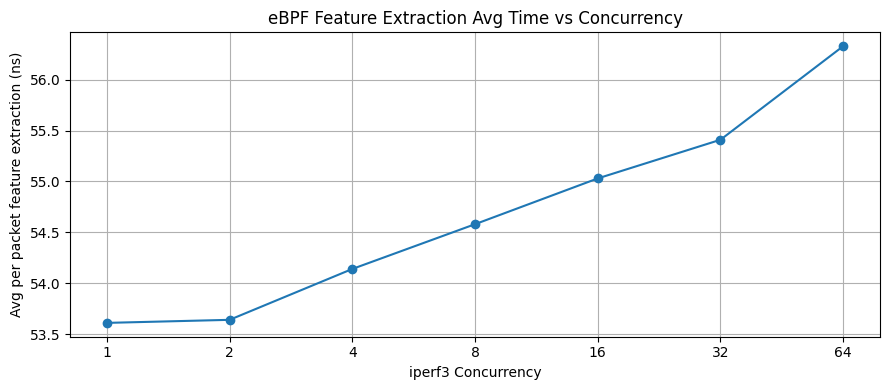

In [4]:
import matplotlib.pyplot as plt

# 并发数列表（实验点）
concurrency_list = [1, 2, 4, 8, 16, 32, 64]
# 对应的平均耗时（单位 ns），按你的计算结果
avg_per_call_all = [53.61, 53.64, 54.14, 54.58, 55.03, 55.41, 56.33]  

# X 轴用索引，确保等距
x_idx = list(range(len(concurrency_list)))

plt.figure(figsize=(9,4))
plt.plot(x_idx, avg_per_call_all, marker='o', linestyle='-')
plt.xlabel("iperf3 Concurrency")
plt.ylabel("Avg per packet feature extraction (ns)")
plt.title("eBPF Feature Extraction Avg Time vs Concurrency")

# 设置 X 轴标签为并发数，均匀分布
plt.xticks(x_idx, concurrency_list)
plt.grid(True)
plt.tight_layout()
plt.show()


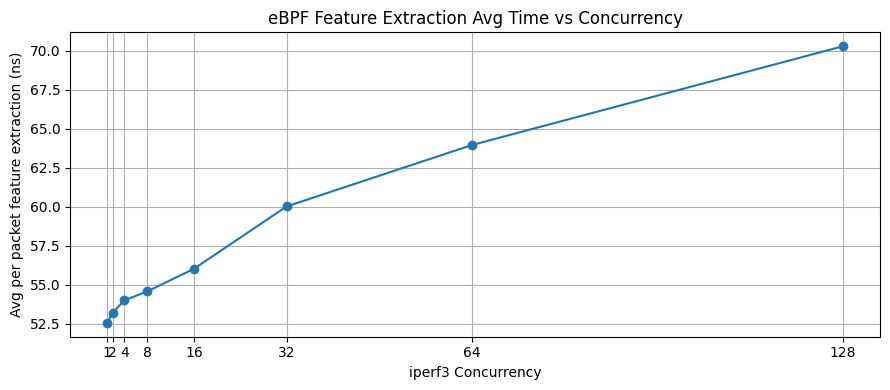

Concurrency 1: Avg per calls = 52.54 ns
Concurrency 2: Avg per calls = 53.18 ns
Concurrency 4: Avg per calls = 53.99 ns
Concurrency 8: Avg per calls = 54.57 ns
Concurrency 16: Avg per calls = 56.01 ns
Concurrency 32: Avg per calls = 60.01 ns
Concurrency 64: Avg per calls = 63.95 ns
Concurrency 128: Avg per calls = 70.29 ns


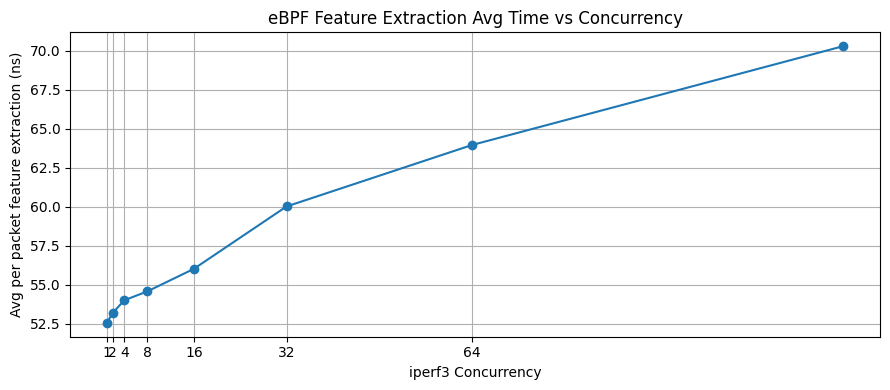

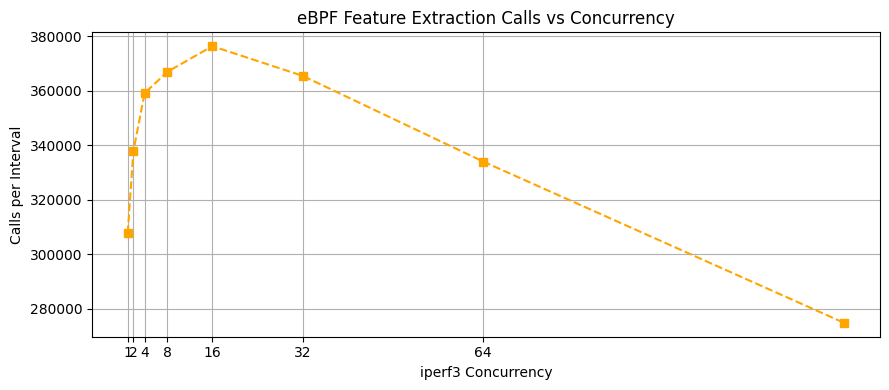

Concurrency 1: Avg per call = 52.54 ns, Avg calls = 307727
Concurrency 2: Avg per call = 53.18 ns, Avg calls = 337753
Concurrency 4: Avg per call = 53.99 ns, Avg calls = 359045
Concurrency 8: Avg per call = 54.57 ns, Avg calls = 366830
Concurrency 16: Avg per call = 56.01 ns, Avg calls = 376282
Concurrency 32: Avg per call = 60.01 ns, Avg calls = 365403
Concurrency 64: Avg per call = 63.95 ns, Avg calls = 333967
Concurrency 128: Avg per call = 70.29 ns, Avg calls = 274779


In [34]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
import re
import numpy as np

# -------------------------
# 1. 粘贴你全部 perf_stats 输出（带并发标记如 "1:", "2:", "4:" 等）
# -------------------------
raw_text = """
1:
Interval perf stats: calls=238855, avg=54.06 ns, max=18819 ns
Interval perf stats: calls=314355, avg=53.16 ns, max=39401 ns
Interval perf stats: calls=290447, avg=52.63 ns, max=39401 ns
Interval perf stats: calls=308733, avg=52.68 ns, max=65249 ns
Interval perf stats: calls=301421, avg=53.20 ns, max=65249 ns
Interval perf stats: calls=304880, avg=52.17 ns, max=65249 ns
Interval perf stats: calls=331969, avg=52.90 ns, max=65249 ns
Interval perf stats: calls=341152, avg=52.12 ns, max=65249 ns
Interval perf stats: calls=337228, avg=53.56 ns, max=65249 ns
Interval perf stats: calls=341491, avg=52.89 ns, max=65249 ns
Interval perf stats: calls=342864, avg=52.95 ns, max=65249 ns
Interval perf stats: calls=322570, avg=51.88 ns, max=65249 ns
Interval perf stats: calls=310508, avg=51.42 ns, max=65249 ns
Interval perf stats: calls=307232, avg=52.77 ns, max=65249 ns
Interval perf stats: calls=308907, avg=52.94 ns, max=65249 ns
Interval perf stats: calls=314438, avg=52.14 ns, max=65249 ns
Interval perf stats: calls=307092, avg=52.19 ns, max=65249 ns
Interval perf stats: calls=332368, avg=53.83 ns, max=65249 ns
Interval perf stats: calls=347658, avg=52.72 ns, max=65249 ns
Interval perf stats: calls=347245, avg=53.02 ns, max=65249 ns
Interval perf stats: calls=346944, avg=52.98 ns, max=65249 ns
Interval perf stats: calls=319263, avg=52.77 ns, max=65249 ns
Interval perf stats: calls=301355, avg=52.10 ns, max=65249 ns
Interval perf stats: calls=309151, avg=51.93 ns, max=65249 ns
Interval perf stats: calls=309111, avg=52.39 ns, max=65249 ns
Interval perf stats: calls=309417, avg=51.28 ns, max=65249 ns
Interval perf stats: calls=309547, avg=52.00 ns, max=65249 ns
Interval perf stats: calls=314470, avg=51.98 ns, max=65249 ns
Interval perf stats: calls=313172, avg=51.70 ns, max=65249 ns
Interval perf stats: calls=310538, avg=52.01 ns, max=65249 ns
Interval perf stats: calls=45155, avg=52.48 ns, max=65249 ns
2:
Interval perf stats: calls=280986, avg=52.60 ns, max=65249 ns
Interval perf stats: calls=327760, avg=52.65 ns, max=65249 ns
Interval perf stats: calls=333776, avg=52.70 ns, max=65249 ns
Interval perf stats: calls=331784, avg=52.52 ns, max=65249 ns
Interval perf stats: calls=323584, avg=52.17 ns, max=65249 ns
Interval perf stats: calls=323344, avg=52.87 ns, max=65249 ns
Interval perf stats: calls=328464, avg=52.25 ns, max=65249 ns
Interval perf stats: calls=336016, avg=53.41 ns, max=65249 ns
Interval perf stats: calls=326501, avg=54.34 ns, max=65249 ns
Interval perf stats: calls=338528, avg=53.70 ns, max=65249 ns
Interval perf stats: calls=324240, avg=52.83 ns, max=65249 ns
Interval perf stats: calls=329223, avg=53.94 ns, max=65249 ns
Interval perf stats: calls=339200, avg=53.10 ns, max=65249 ns
Interval perf stats: calls=325360, avg=53.36 ns, max=65249 ns
Interval perf stats: calls=326960, avg=53.87 ns, max=65249 ns
Interval perf stats: calls=334400, avg=53.16 ns, max=65249 ns
Interval perf stats: calls=326616, avg=53.14 ns, max=65249 ns
Interval perf stats: calls=335272, avg=53.20 ns, max=65249 ns
Interval perf stats: calls=335760, avg=52.96 ns, max=65249 ns
Interval perf stats: calls=324200, avg=53.92 ns, max=65249 ns
Interval perf stats: calls=341144, avg=53.87 ns, max=65249 ns
Interval perf stats: calls=324824, avg=52.49 ns, max=65249 ns
Interval perf stats: calls=339295, avg=54.04 ns, max=65249 ns
Interval perf stats: calls=356152, avg=53.50 ns, max=65249 ns
Interval perf stats: calls=353176, avg=53.42 ns, max=65249 ns
Interval perf stats: calls=372175, avg=53.12 ns, max=65249 ns
Interval perf stats: calls=366592, avg=52.97 ns, max=89859 ns
Interval perf stats: calls=361792, avg=53.32 ns, max=89859 ns
Interval perf stats: calls=362992, avg=53.10 ns, max=89859 ns
Interval perf stats: calls=367024, avg=52.87 ns, max=89859 ns
Interval perf stats: calls=373199, avg=53.12 ns, max=89859 ns
4:
Interval perf stats: calls=248852, avg=54.30 ns, max=89859 ns
Interval perf stats: calls=331376, avg=53.95 ns, max=89859 ns
Interval perf stats: calls=370256, avg=54.16 ns, max=89859 ns
Interval perf stats: calls=373968, avg=53.21 ns, max=89859 ns
Interval perf stats: calls=367744, avg=55.00 ns, max=89859 ns
Interval perf stats: calls=359568, avg=55.44 ns, max=89859 ns
Interval perf stats: calls=382592, avg=53.24 ns, max=89859 ns
Interval perf stats: calls=352411, avg=55.01 ns, max=89859 ns
Interval perf stats: calls=368840, avg=54.43 ns, max=144236 ns
Interval perf stats: calls=379528, avg=53.55 ns, max=144236 ns
Interval perf stats: calls=379560, avg=53.11 ns, max=144236 ns
Interval perf stats: calls=366704, avg=54.73 ns, max=144236 ns
Interval perf stats: calls=378960, avg=53.45 ns, max=144236 ns
Interval perf stats: calls=384256, avg=53.47 ns, max=144236 ns
Interval perf stats: calls=380496, avg=53.49 ns, max=144236 ns
Interval perf stats: calls=378248, avg=53.47 ns, max=144236 ns
Interval perf stats: calls=376168, avg=53.57 ns, max=144236 ns
Interval perf stats: calls=377408, avg=53.24 ns, max=144236 ns
Interval perf stats: calls=372688, avg=54.16 ns, max=144236 ns
Interval perf stats: calls=367760, avg=54.71 ns, max=144236 ns
Interval perf stats: calls=369741, avg=54.95 ns, max=144236 ns
Interval perf stats: calls=371612, avg=54.59 ns, max=144236 ns
Interval perf stats: calls=380587, avg=53.55 ns, max=144236 ns
Interval perf stats: calls=364055, avg=54.47 ns, max=144236 ns
Interval perf stats: calls=379408, avg=53.88 ns, max=144236 ns
Interval perf stats: calls=387559, avg=52.54 ns, max=144236 ns
Interval perf stats: calls=376400, avg=54.67 ns, max=144236 ns
Interval perf stats: calls=381976, avg=53.87 ns, max=144236 ns
Interval perf stats: calls=386524, avg=53.30 ns, max=144236 ns
Interval perf stats: calls=375340, avg=54.31 ns, max=144236 ns
Interval perf stats: calls=59825, avg=53.93 ns, max=144236 ns
8:
Interval perf stats: calls=253186, avg=55.11 ns, max=144236 ns
Interval perf stats: calls=347744, avg=55.35 ns, max=144236 ns
Interval perf stats: calls=338784, avg=57.58 ns, max=144236 ns
Interval perf stats: calls=368839, avg=56.25 ns, max=391601 ns
Interval perf stats: calls=370745, avg=55.20 ns, max=391601 ns
Interval perf stats: calls=364381, avg=55.33 ns, max=391601 ns
Interval perf stats: calls=373696, avg=54.66 ns, max=391601 ns
Interval perf stats: calls=380160, avg=54.27 ns, max=391601 ns
Interval perf stats: calls=384528, avg=54.45 ns, max=391601 ns
Interval perf stats: calls=379712, avg=54.49 ns, max=391601 ns
Interval perf stats: calls=385766, avg=53.95 ns, max=391601 ns
Interval perf stats: calls=387764, avg=54.00 ns, max=391601 ns
Interval perf stats: calls=388272, avg=54.61 ns, max=391601 ns
Interval perf stats: calls=386536, avg=53.57 ns, max=391601 ns
Interval perf stats: calls=390120, avg=53.73 ns, max=391601 ns
Interval perf stats: calls=390880, avg=53.21 ns, max=391601 ns
Interval perf stats: calls=391040, avg=54.07 ns, max=391601 ns
Interval perf stats: calls=388976, avg=54.09 ns, max=391601 ns
Interval perf stats: calls=385376, avg=54.50 ns, max=391601 ns
Interval perf stats: calls=385472, avg=54.12 ns, max=391601 ns
Interval perf stats: calls=392480, avg=53.84 ns, max=391601 ns
Interval perf stats: calls=380552, avg=55.53 ns, max=391601 ns
Interval perf stats: calls=390001, avg=54.44 ns, max=391601 ns
Interval perf stats: calls=382481, avg=55.00 ns, max=391601 ns
Interval perf stats: calls=386166, avg=54.48 ns, max=391601 ns
Interval perf stats: calls=382527, avg=54.77 ns, max=391601 ns
Interval perf stats: calls=389262, avg=53.95 ns, max=391601 ns
Interval perf stats: calls=384834, avg=54.95 ns, max=391601 ns
Interval perf stats: calls=392144, avg=53.39 ns, max=391601 ns
Interval perf stats: calls=392139, avg=54.23 ns, max=391601 ns
Interval perf stats: calls=57162, avg=54.45 ns, max=391601 ns
16:
Interval perf stats: calls=259369, avg=58.62 ns, max=391601 ns
Interval perf stats: calls=379408, avg=55.95 ns, max=391601 ns
Interval perf stats: calls=385344, avg=55.25 ns, max=391601 ns
Interval perf stats: calls=383488, avg=55.92 ns, max=391601 ns
Interval perf stats: calls=365824, avg=57.70 ns, max=391601 ns
Interval perf stats: calls=382048, avg=55.43 ns, max=391601 ns
Interval perf stats: calls=380129, avg=55.30 ns, max=391601 ns
Interval perf stats: calls=387279, avg=55.11 ns, max=391601 ns
Interval perf stats: calls=386256, avg=55.69 ns, max=391601 ns
Interval perf stats: calls=379616, avg=56.43 ns, max=391601 ns
Interval perf stats: calls=381328, avg=55.38 ns, max=391601 ns
Interval perf stats: calls=389040, avg=55.39 ns, max=391601 ns
Interval perf stats: calls=379888, avg=57.26 ns, max=391601 ns
Interval perf stats: calls=398840, avg=54.83 ns, max=391601 ns
Interval perf stats: calls=385192, avg=55.33 ns, max=391601 ns
Interval perf stats: calls=388272, avg=55.20 ns, max=391601 ns
Interval perf stats: calls=382113, avg=55.27 ns, max=391601 ns
Interval perf stats: calls=379455, avg=56.48 ns, max=391601 ns
Interval perf stats: calls=379040, avg=56.70 ns, max=391601 ns
Interval perf stats: calls=385440, avg=55.22 ns, max=391601 ns
Interval perf stats: calls=379056, avg=56.59 ns, max=391601 ns
Interval perf stats: calls=378608, avg=55.94 ns, max=391601 ns
Interval perf stats: calls=385120, avg=55.38 ns, max=391601 ns
Interval perf stats: calls=387584, avg=56.55 ns, max=391601 ns
Interval perf stats: calls=388832, avg=55.37 ns, max=391601 ns
Interval perf stats: calls=381887, avg=55.53 ns, max=391601 ns
Interval perf stats: calls=383648, avg=55.27 ns, max=391601 ns
Interval perf stats: calls=379301, avg=55.84 ns, max=391601 ns
Interval perf stats: calls=387703, avg=57.56 ns, max=391601 ns
Interval perf stats: calls=337776, avg=56.76 ns, max=391601 ns
Interval perf stats: calls=337852, avg=56.96 ns, max=391601 ns
32:
Interval perf stats: calls=335652, avg=58.86 ns, max=391601 ns
Interval perf stats: calls=364306, avg=60.34 ns, max=391601 ns
Interval perf stats: calls=342272, avg=61.38 ns, max=391601 ns
Interval perf stats: calls=364096, avg=60.02 ns, max=391601 ns
Interval perf stats: calls=363008, avg=61.84 ns, max=391601 ns
Interval perf stats: calls=370704, avg=60.46 ns, max=391601 ns
Interval perf stats: calls=363240, avg=59.65 ns, max=391601 ns
Interval perf stats: calls=368824, avg=59.13 ns, max=391601 ns
Interval perf stats: calls=363616, avg=60.24 ns, max=391601 ns
Interval perf stats: calls=385264, avg=59.65 ns, max=391601 ns
Interval perf stats: calls=370720, avg=61.00 ns, max=391601 ns
Interval perf stats: calls=367600, avg=59.74 ns, max=391601 ns
Interval perf stats: calls=368240, avg=59.46 ns, max=391601 ns
Interval perf stats: calls=355400, avg=60.24 ns, max=391601 ns
Interval perf stats: calls=378544, avg=59.95 ns, max=391601 ns
Interval perf stats: calls=370688, avg=59.25 ns, max=391601 ns
Interval perf stats: calls=363776, avg=59.49 ns, max=391601 ns
Interval perf stats: calls=364128, avg=59.55 ns, max=391601 ns
Interval perf stats: calls=371680, avg=59.29 ns, max=391601 ns
Interval perf stats: calls=366976, avg=59.40 ns, max=391601 ns
Interval perf stats: calls=368544, avg=58.75 ns, max=391601 ns
Interval perf stats: calls=365262, avg=60.69 ns, max=391601 ns
Interval perf stats: calls=358354, avg=61.19 ns, max=391601 ns
Interval perf stats: calls=364736, avg=60.39 ns, max=391601 ns
Interval perf stats: calls=369182, avg=60.71 ns, max=391601 ns
Interval perf stats: calls=364117, avg=60.65 ns, max=391601 ns
Interval perf stats: calls=362495, avg=60.30 ns, max=391601 ns
Interval perf stats: calls=370624, avg=59.21 ns, max=391601 ns
Interval perf stats: calls=372288, avg=59.74 ns, max=391601 ns
Interval perf stats: calls=365008, avg=60.02 ns, max=391601 ns
Interval perf stats: calls=368161, avg=59.70 ns, max=391601 ns
64:
Interval perf stats: calls=253288, avg=66.03 ns, max=391601 ns
Interval perf stats: calls=310224, avg=63.82 ns, max=391601 ns
Interval perf stats: calls=330192, avg=66.21 ns, max=659728 ns
Interval perf stats: calls=353936, avg=63.14 ns, max=659728 ns
Interval perf stats: calls=344214, avg=62.62 ns, max=659728 ns
Interval perf stats: calls=340144, avg=62.77 ns, max=659728 ns
Interval perf stats: calls=336016, avg=65.06 ns, max=659728 ns
Interval perf stats: calls=335456, avg=63.98 ns, max=659728 ns
Interval perf stats: calls=349265, avg=63.95 ns, max=659728 ns
Interval perf stats: calls=339439, avg=63.58 ns, max=659728 ns
Interval perf stats: calls=340288, avg=62.71 ns, max=659728 ns
Interval perf stats: calls=342416, avg=63.04 ns, max=659728 ns
Interval perf stats: calls=343720, avg=62.79 ns, max=659728 ns
Interval perf stats: calls=352704, avg=63.63 ns, max=659728 ns
Interval perf stats: calls=349032, avg=64.10 ns, max=659728 ns
Interval perf stats: calls=331064, avg=64.60 ns, max=659728 ns
Interval perf stats: calls=332451, avg=63.94 ns, max=659728 ns
Interval perf stats: calls=325050, avg=63.58 ns, max=659728 ns
Interval perf stats: calls=341630, avg=62.78 ns, max=659728 ns
Interval perf stats: calls=338354, avg=62.69 ns, max=391601 ns
Interval perf stats: calls=328800, avg=64.89 ns, max=659728 ns
Interval perf stats: calls=336336, avg=63.79 ns, max=659728 ns
Interval perf stats: calls=342816, avg=63.43 ns, max=659728 ns
Interval perf stats: calls=336081, avg=63.10 ns, max=659728 ns
Interval perf stats: calls=335666, avg=63.72 ns, max=659728 ns
Interval perf stats: calls=318564, avg=68.01 ns, max=659728 ns
Interval perf stats: calls=340822, avg=63.31 ns, max=659728 ns
Interval perf stats: calls=342288, avg=62.25 ns, max=659728 ns
Interval perf stats: calls=343362, avg=63.62 ns, max=659728 ns
Interval perf stats: calls=337176, avg=66.60 ns, max=659728 ns
Interval perf stats: calls=302186, avg=64.74 ns, max=659728 ns
128:
Interval perf stats: calls=158991, avg=71.94 ns, max=25274 ns
Interval perf stats: calls=273904, avg=70.46 ns, max=25274 ns
Interval perf stats: calls=278540, avg=69.32 ns, max=43442 ns
Interval perf stats: calls=278035, avg=69.97 ns, max=43442 ns
Interval perf stats: calls=269063, avg=73.30 ns, max=306361 ns
Interval perf stats: calls=284053, avg=72.00 ns, max=306361 ns
Interval perf stats: calls=276024, avg=71.12 ns, max=306361 ns
Interval perf stats: calls=271935, avg=70.14 ns, max=306361 ns
Interval perf stats: calls=278320, avg=72.52 ns, max=306361 ns
Interval perf stats: calls=280260, avg=69.61 ns, max=306361 ns
Interval perf stats: calls=276480, avg=68.74 ns, max=306361 ns
Interval perf stats: calls=281698, avg=69.96 ns, max=306361 ns
Interval perf stats: calls=287309, avg=70.22 ns, max=306361 ns
Interval perf stats: calls=289674, avg=67.55 ns, max=306361 ns
Interval perf stats: calls=276508, avg=70.27 ns, max=306361 ns
Interval perf stats: calls=280764, avg=69.83 ns, max=306361 ns
Interval perf stats: calls=280655, avg=69.77 ns, max=306361 ns
Interval perf stats: calls=281279, avg=68.95 ns, max=306361 ns
Interval perf stats: calls=278777, avg=69.48 ns, max=306361 ns
Interval perf stats: calls=283600, avg=67.23 ns, max=306361 ns
Interval perf stats: calls=263257, avg=74.80 ns, max=306361 ns
Interval perf stats: calls=275530, avg=68.91 ns, max=306361 ns
Interval perf stats: calls=289296, avg=68.40 ns, max=306361 ns
Interval perf stats: calls=279738, avg=74.20 ns, max=306361 ns
Interval perf stats: calls=267695, avg=73.07 ns, max=306361 ns
Interval perf stats: calls=271775, avg=71.84 ns, max=306361 ns
Interval perf stats: calls=281116, avg=69.05 ns, max=306361 ns
Interval perf stats: calls=282013, avg=67.69 ns, max=306361 ns
Interval perf stats: calls=285594, avg=69.45 ns, max=306361 ns
Interval perf stats: calls=281490, avg=68.81 ns, max=306361 ns
"""

# -------------------------
# 按并发段分块
# -------------------------
concurrency_blocks = re.split(r'\n(\d+):', raw_text)
concurrency_list = []
avg_per_call_all = []

for i in range(1, len(concurrency_blocks), 2):
    concurrency = int(concurrency_blocks[i])
    data_block = concurrency_blocks[i+1]
    
    # 提取 Avg per call
    pattern = re.compile(r'avg=([\d\.]+)\s*ns')

    matches = pattern.findall(data_block)
    values = [float(m) for m in matches]
    
    if values:
        avg_value = sum(values) / len(values)
    else:
        avg_value = 0

    concurrency_list.append(concurrency)
    avg_per_call_all.append(avg_value)

avg_per_call_all
# -------------------------
# 绘图
# -------------------------
plt.figure(figsize=(9,4))
plt.plot(concurrency_list, avg_per_call_all, marker='o', linestyle='-')
plt.xlabel("iperf3 Concurrency")
plt.ylabel("Avg per packet feature extraction (ns)")
plt.title("eBPF Feature Extraction Avg Time vs Concurrency")
plt.xticks([1,2,4,8,16,32,64,128])  # 平均分 X 轴
plt.grid(True)
plt.tight_layout()
plt.show()

# 打印结果
for c, avg in zip(concurrency_list, avg_per_call_all):
    print(f"Concurrency {c}: Avg per calls = {avg:.2f} ns")


# -------------------------
# 按并发段分块
# -------------------------
concurrency_blocks = re.split(r'\n(\d+):', raw_text)
concurrency_list = []
avg_per_call_all = []
avg_calls_all = []

for i in range(1, len(concurrency_blocks), 2):
    concurrency = int(concurrency_blocks[i])
    data_block = concurrency_blocks[i+1]
    
    # 提取 Avg per call
    avg_pattern = re.compile(r'avg=([\d\.]+)\s*ns')
    avg_matches = avg_pattern.findall(data_block)
    avg_values = [float(m) for m in avg_matches]
    avg_value = sum(avg_values) / len(avg_values) if avg_values else 0

    # 提取 calls
    calls_pattern = re.compile(r'calls=(\d+)')
    calls_matches = calls_pattern.findall(data_block)
    calls_values = [int(m) for m in calls_matches]
    avg_calls = sum(calls_values) / len(calls_values) if calls_values else 0

    concurrency_list.append(concurrency)
    avg_per_call_all.append(avg_value)
    avg_calls_all.append(avg_calls)

# -------------------------
# 绘图 Avg per call
# -------------------------
plt.figure(figsize=(9,4))
plt.plot(concurrency_list, avg_per_call_all, marker='o', linestyle='-')
plt.xlabel("iperf3 Concurrency")
plt.ylabel("Avg per packet feature extraction (ns)")
plt.title("eBPF Feature Extraction Avg Time vs Concurrency")
plt.xticks([1,2,4,8,16,32,64])
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------
# 绘图 Calls
# -------------------------
plt.figure(figsize=(9,4))
plt.plot(concurrency_list, avg_calls_all, marker='s', linestyle='--', color='orange')
plt.xlabel("iperf3 Concurrency")
plt.ylabel("Calls per Interval")
plt.title("eBPF Feature Extraction Calls vs Concurrency")
plt.xticks([1,2,4,8,16,32,64])
plt.grid(True)
plt.tight_layout()
plt.show()

# 打印结果
for c, avg_call, calls in zip(concurrency_list, avg_per_call_all, avg_calls_all):
    print(f"Concurrency {c}: Avg per call = {avg_call:.2f} ns, Avg calls = {calls:.0f}")


Concurrency	CPU Usage (%)
1		0.808
2		0.898
4		0.969
8		1.001
16		1.054
32		1.096
64		1.068
128		0.966


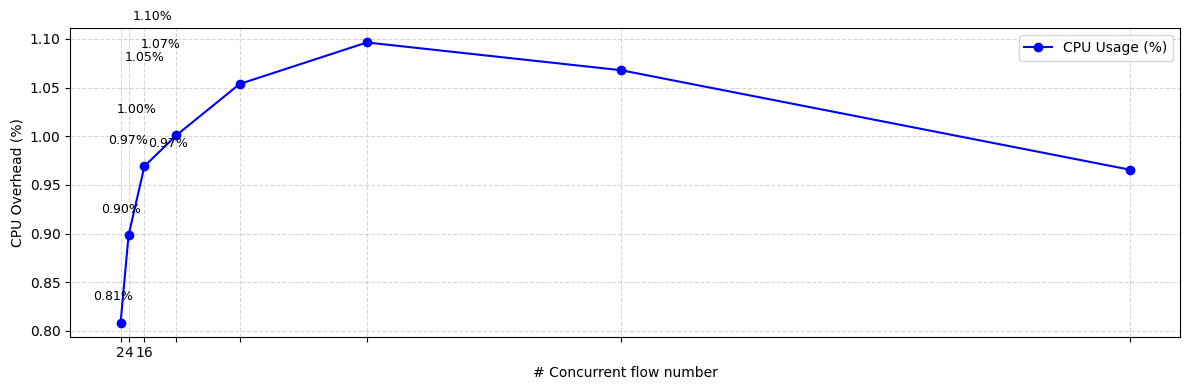

In [36]:
import matplotlib.pyplot as plt

# 数据：并发数、平均每包耗时(ns)、平均每秒调用次数
concurrency = [1, 2, 4, 8, 16, 32, 64, 128]
avg_per_call_ns = [52.54, 53.18, 53.99, 54.57, 56.01, 60.01, 63.95, 70.29]  # ns
avg_calls = [307727, 337753, 359045, 366830, 376282, 365403, 333967,274779]  # calls/sec

num_cores = 2  # CPU 核心数

# 计算 CPU 使用率
cpu_usage_percent = []
for t_ns, calls in zip(avg_per_call_ns, avg_calls):
    cpu = t_ns * calls / (num_cores * 1e9) * 100
    cpu_usage_percent.append(cpu)

# 输出计算结果
print("Concurrency\tCPU Usage (%)")
for c, cpu in zip(concurrency, cpu_usage_percent):
    print(f"{c}\t\t{cpu:.3f}")

# 绘图
plt.figure(figsize=(12, 4))
# plt.plot(range(len(concurrency)), cpu_usage_percent, marker='o', linestyle='-', color='olive', label='CPU Usage (%)')
plt.xticks(range(len(concurrency)), concurrency)
plt.plot(concurrency, cpu_usage_percent, marker='o', linestyle='-', color='b', label='CPU Usage (%)')
plt.xlabel("# Concurrent flow number")
plt.ylabel("CPU Overhead (%)")
# plt.title("eBPF Feature Extraction CPU Usage vs Concurrency")
plt.xticks(concurrency)

# 给每个点标注数值
# 给每个点标注具体数值
for i, y in enumerate(cpu_usage_percent):
    plt.text(i, y + 0.02, f"{y:.2f}%", ha='center', va='bottom', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_287/3569566269.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


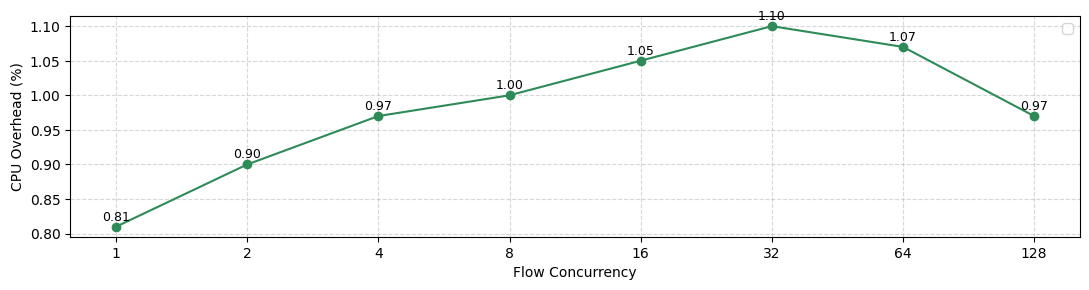

In [42]:
import matplotlib.pyplot as plt

# 原始数据
data = {
    1: 0.808,
    2: 0.899,
    4: 0.969,
    8: 1.001,
    16: 1.054,
    32: 1.096,
    64: 1.068,
    128: 0.966
}

# 四舍五入保留两位小数
data_rounded = {k: round(v, 2) for k, v in data.items()}

# 提取 x, y
concurrency = list(data_rounded.keys())
cpu_usage = list(data_rounded.values())

# 绘图
plt.figure(figsize=(11, 3))
plt.plot(range(len(concurrency)), cpu_usage, marker='o', linestyle='-', color='seagreen')

# x轴均匀分布并显示并发数
plt.xticks(range(len(concurrency)), concurrency)

# 给每个点标注数值
for i, y in enumerate(cpu_usage):
    plt.text(i, y + 0.005, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

plt.xlabel("Flow Concurrency")
plt.ylabel("CPU Overhead (%)")
# plt.title("eBPF feature extraction CPU usage under different concurrency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
